# Boom Bikes - Linear Regression Model

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### Objective: The goal is to build a linear model to analyse the demand for shared bikes with the available independent variables. So that we can understand how exactly the demands vary with different features, based on the analysis, we can make the business strategy to meet the demand levels and meet the customer's expectations.

## Importing Necessary Libraries

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Step 1: Reading and Understanding the Data

##  Importing data

In [5]:
data=pd.read_csv('BoomBikes.csv')

In [6]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding

### Dataset characteristics
BoomBikes.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Data Sanity Check

In [7]:
data.shape

(730, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Missing Value Check

In [10]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values present in the dataset

### Check for Duplicates

In [11]:
data.duplicated().sum()

0

There are no duplicates found

# Setp 2: Data Preparetion

## Coverting numerical values into categorical values 

##### For 'season' column 

In [12]:
data['season']=data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
data['season'].value_counts().sum()

730

##### For 'weathersit' column 

In [15]:
data['weathersit']=data['weathersit'].map({1: 'cloudy', 
                                           2: 'mist', 
                                           3: 'light Rain', 
                                           4: 'heavy Rain'})

In [16]:
data['weathersit'].value_counts()

cloudy        463
mist          246
light Rain     21
Name: weathersit, dtype: int64

In [17]:
data['weathersit'].value_counts().sum()

730

##### For 'mnth' column

In [18]:
data['mnth']=data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [19]:
data['mnth'].value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [20]:
data['mnth'].value_counts().sum()

730

##### For 'weekday' column

In [21]:
data['weekday']=data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [22]:
data['weekday'].value_counts()

mon    105
tue    105
wed    104
thu    104
fri    104
sat    104
sun    104
Name: weekday, dtype: int64

In [23]:
data['weekday'].value_counts().sum()

730

## Dropping columns which are not contributing much for Analysis

##### Droping coulmn "instant" as it is just a record index
##### Droping coulmns "casual" and "registered" as these columns are having "cnt" data

In [24]:
data=data.drop('instant', axis=1)

In [25]:
data=data.drop('casual', axis=1)
data=data.drop('registered', axis=1)

In [26]:
data=data.drop('dteday',axis=1)

In [27]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
data.shape

(730, 12)

# Step 3: EDA

##### Lets find unique values of each column so that we can easily bifurcate continous and categorical columns

In [29]:
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

##### We will create the list of variable based on data types

In [30]:
# Columns which contains continues values
cont_cols=['temp','atemp','hum','windspeed']

# Columns which contains catagorical values
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

# target variable for the analysis
target=['cnt']


In [31]:
# cheking the lenght
len(cont_cols)+len(cat_cols)+len(target)

12

## Univariate Analysis

##### Let's conduct Univariate analysis  for making data interpretation and to understand how data is distributed in each column.

##### For continues columns
- Histogram 

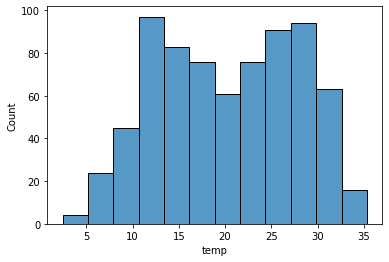

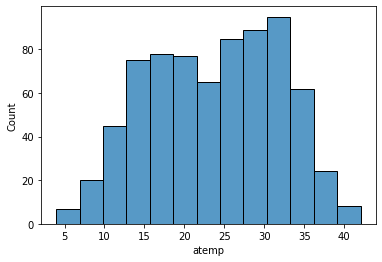

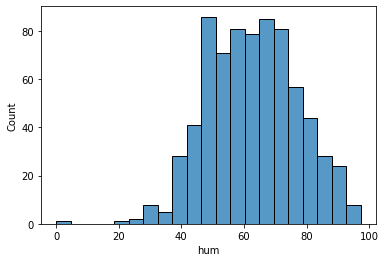

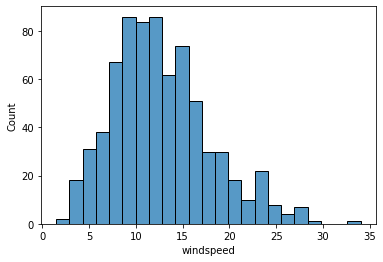

In [32]:
for i in cont_cols:
    sns.histplot(data[i])
    plt.show()

##### From the above graphs we can see that all the Variables are well distributed

- Boxplot

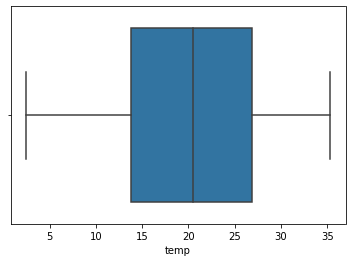

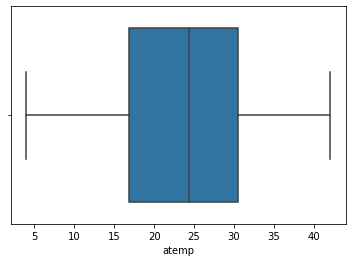

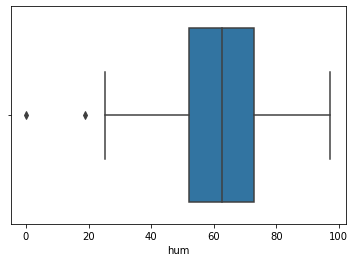

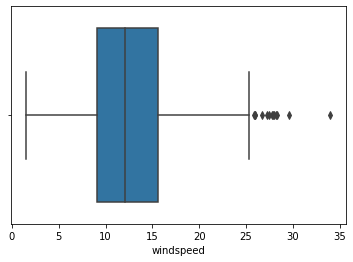

In [33]:
for i in cont_cols:
    sns.boxplot(data[i])
    plt.show()

##### From the  above boxplot  we can see that in variable 'temp' and 'atem' there are no outliers are found. And Variables 'hum' and ''windspeed' are having negligible Outliers

##### For categorical columns
- Countplot

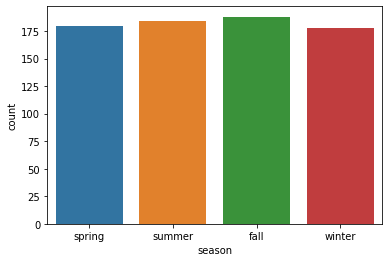

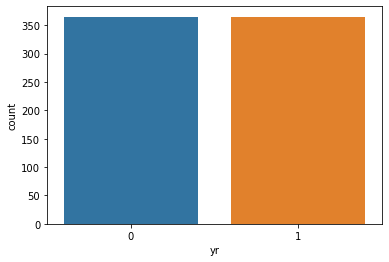

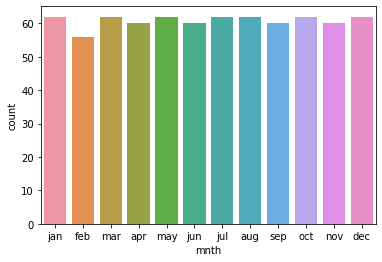

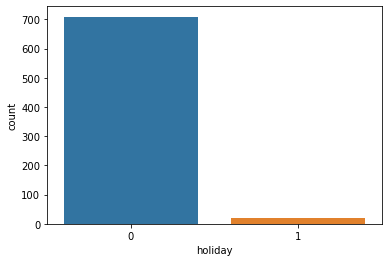

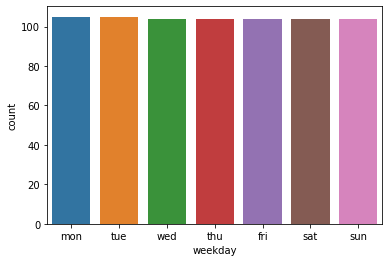

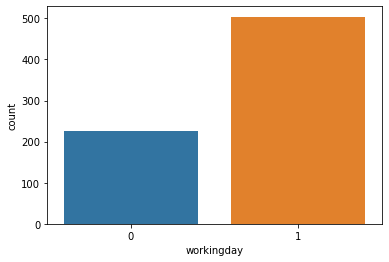

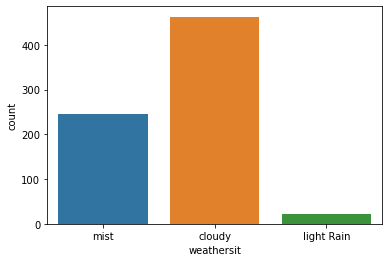

In [34]:
for i in cat_cols:
    sns.countplot(data[i])
    plt.show()

##### From above Countplot graphs we can make following Observations
- We can say from variable "season" graph that users used the rental bike more in Rainfall season compare to others.
- We can say from variable "yr" graph that users used the rental bike in both year 2018 & 2019 are almost same.
- We can say from variable "mnth" graph that users used the rental bike less in feb.
- We can say from variable "holiday" graph that users used the rental bike at most during holidays.
-  We can say from variable "weekday" graph that users used the rental bike more in Monday and Tuesday compare to other weekdays.
- We can say from variable "workingday" graph that users used the rental bike more in holiday than workingday
- We can say from variable "weathersit" graph that users used the rental bike more in cloudy weather compare to misty and light rain

## Bivariate Analysis

##### For continues columns
- Pairplot

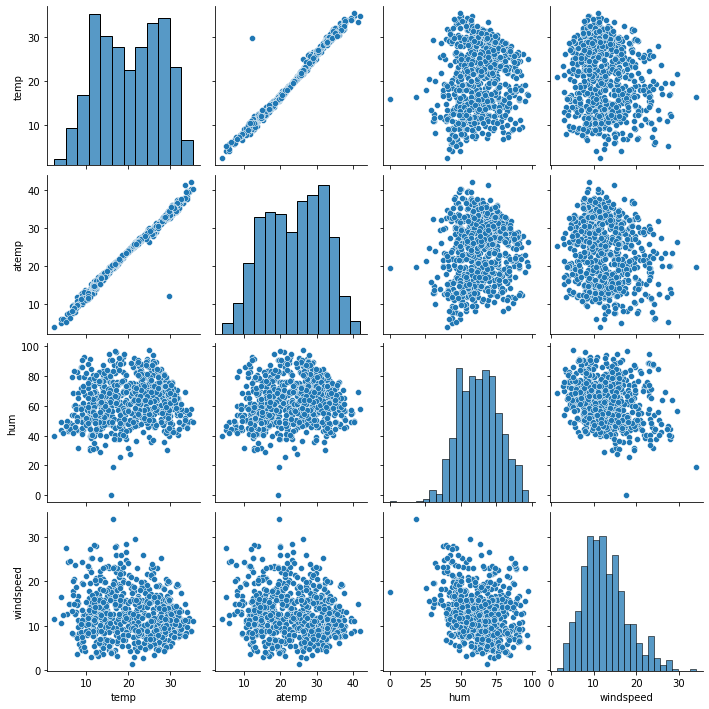

In [35]:
sns.pairplot(data[cont_cols])

- scatterplot

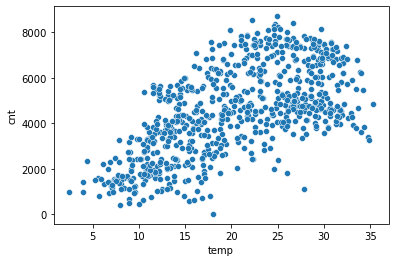

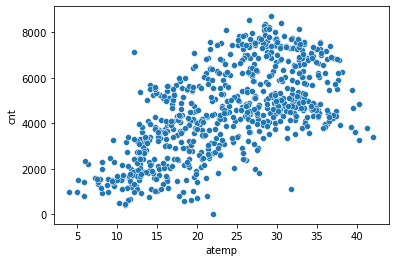

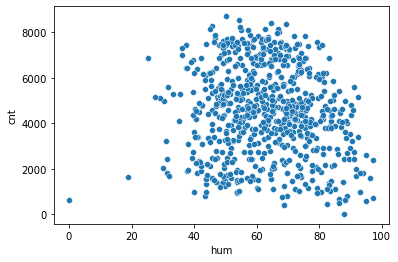

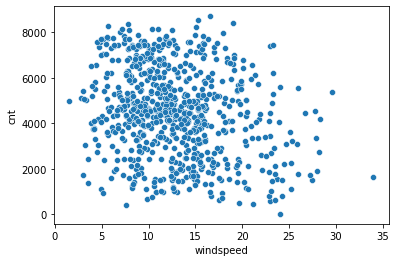

In [36]:
for i in cont_cols:
    sns.scatterplot(data[i],data["cnt"])
    plt.show()

##### From the above Scatterplots  (Target variable on Y -axis and Independent variables on X-axis) we can make following observations
- temp and atemp are Positively correlated with cnt
- humidity and windspeed are Negatively correlated with cnt

##### For categorical columns
- Barplot

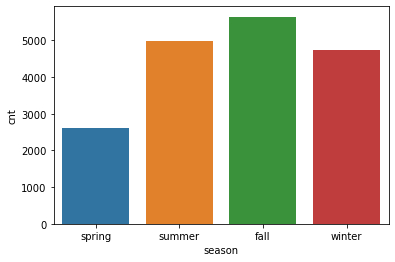

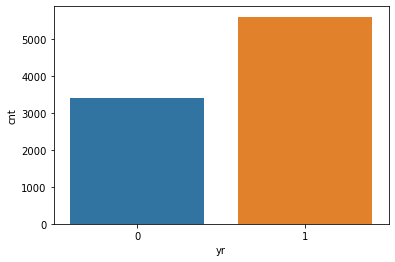

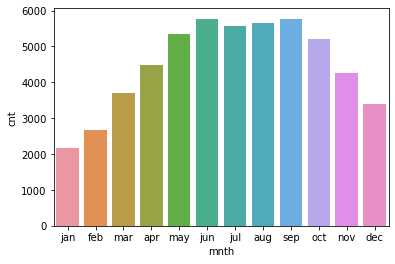

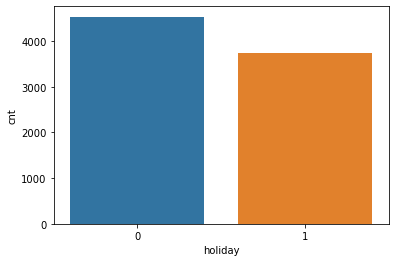

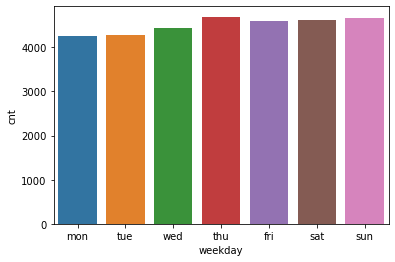

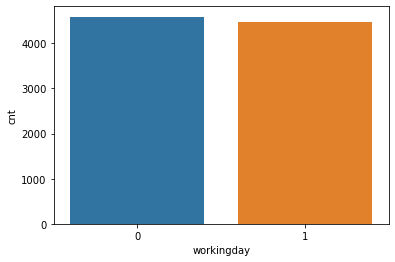

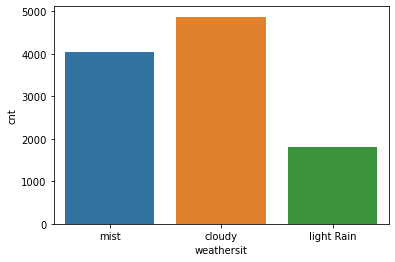

In [37]:
for i in cat_cols:
    sns.barplot(data[i],data["cnt"],ci=None)
    plt.show()

##### From above Barplots we can make following Observations
- We can say from variable "season" graph that users used the rental bike considerably in Rainfall season compare to others.
- We can say from variable "yr" graph that users used the rental bike much higher in year 2019 compared to 2018.
- We can say from variable "mnth" graph that users used the rental bike most in June,July,Aug and Sept(I.e. Rainy season).
- We can say from variable "holiday" graph that users used the rental bike at most during holidays.
- We can say from variable "weekday" graph that users used the rental bike more in Thursday and Sunday compare to other weekdays.
- We can say from variable "workingday" graph that users used the rental bike more in holiday than workingday
- We can say from variable "weathersit" graph that users used the rental bike more in cloudy weather compare to misty and light rain

- Boxplot

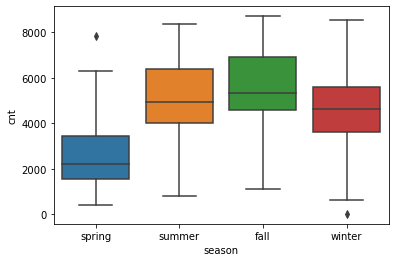

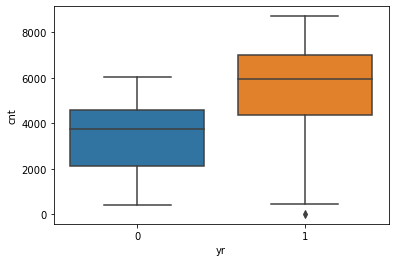

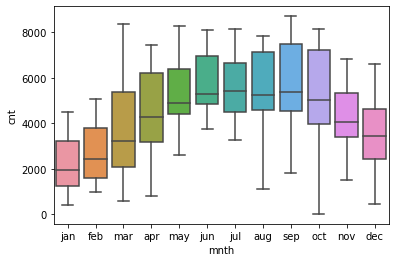

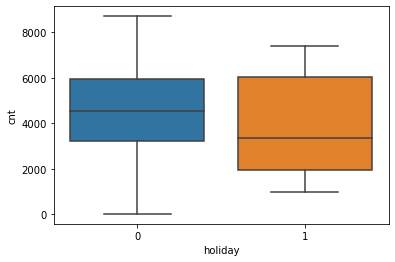

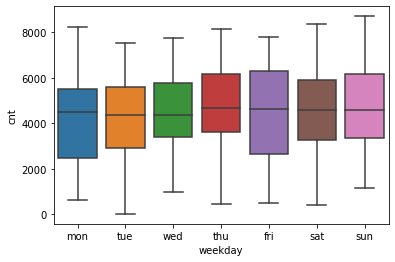

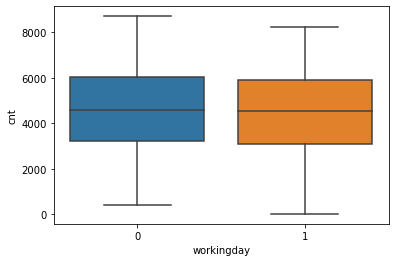

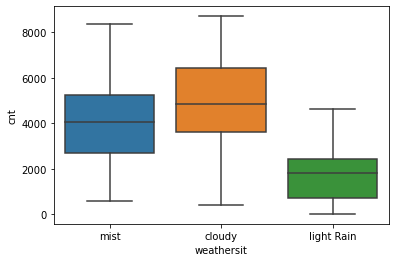

In [38]:
for i in cat_cols:
    sns.boxplot(data[i],data["cnt"])
    plt.show()

##### From above Boxplots we can make following Observations
- We can say from variable "season" graph that the median value is high in Rainfall season as compare to others.
- We can say from variable "yr" graph that the median value is high in year 2019 compared to 2018.
- We can say from variable "mnth" graph that the median value is high in July & Sept compared other months.
- We can say from variable "holiday" graph that the median value is high for holidays.
- We can say from variable "weekday" graph that the median value is high for Thursday compare to other weekdays.
- We can say from variable "workingday" graph that the median value is high during holiday than workingday
- We can say from variable "weathersit" graph that the median value is high in cloudy weather compare to misty and light rain

- Heatmap

<AxesSubplot:>

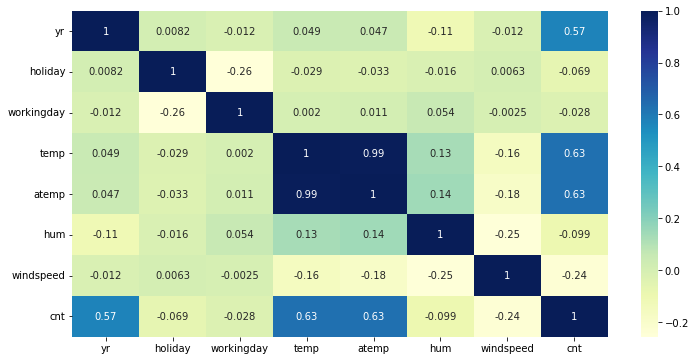

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",)

- From the correlation plot we can see Very high positive correlation between atemp and temp i.e. 0.99 and also they are correlated moderately positive with target variable "cnt"

# Step 4: Dummy Variable

##### Dummy Variable Creation for categorical columns which are having more than two variables.

In [40]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [41]:
data[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [42]:
# For season
season_dummy=pd.get_dummies(data['season'],drop_first=True)

# For mnth
mnth_dummy=pd.get_dummies(data['mnth'],drop_first=True,)

# For weekday
weekday_dummy=pd.get_dummies(data['weekday'],drop_first=True,)

# For weathersit
weathersit_dummy=pd.get_dummies(data['weathersit'],drop_first=True,)

In [43]:
# Adding created dummy variables to the original dataset.

data=pd.concat([data,season_dummy,weathersit_dummy,mnth_dummy,weekday_dummy ],axis=1)


In [44]:
# Dropping original columns- 'season', 'weathersit', 'mnth', and 'weekday'

data.drop('season', axis=1,inplace=True)
data.drop('mnth', axis=1,inplace=True)
data.drop('weekday', axis=1,inplace=True)
data.drop('weathersit', axis=1,inplace=True)

In [45]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data.shape

(730, 30)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  light Rain  730 non-null    uint8  
 12  mist        730 non-null    uint8  
 13  aug         730 non-null    uint8  
 14  dec         730 non-null    uint8  
 15  feb         730 non-null    uint8  
 16  jan         730 non-null    uint8  
 17  jul         730 non-null    uint8  
 18  jun         730 non-null    uint8  
 19  mar         730 non-null    u

# Step 5: Splitting the Data into Training and Testing Sets

In [48]:
# importing sklearn library for splitting data into test and train sets.
from sklearn.model_selection import train_test_split

In [49]:
np.random.seed(0)
df_train, df_test=train_test_split(data, test_size=0.3, train_size=0.7, random_state=100)

In [50]:
print(f'shape of train set: {df_train.shape}, \t shape of test set: {df_test.shape}')

shape of train set: (510, 30), 	 shape of test set: (219, 30)


# Step 6: Rescaling the Feactures using MinMax Scaling

In [51]:
# import MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=MinMaxScaler()

In [53]:
var=['temp','atemp','hum','windspeed','cnt']

# For train set
df_train[var]=scaler.fit_transform(df_train[var])

# For test set
df_test[var]=scaler.fit_transform(df_test[var])

In [54]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [55]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 7 : Building a Linear Model

### Dividing dataset into Target variable (y) and Predictor variable (X).

In [58]:
# Dividing into X and y sets for the model building

# For train-set
y_train=df_train.pop('cnt')
X_train=df_train

# For test-set
y_test=df_test.pop('cnt')
X_test=df_test


### Feature Selection

In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
# Running RFE with the output number of the variable equal to 15
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

In [61]:
selected_cols=[]
for i,j in zip(selector.support_,X_train.columns):
    print(i,'\t',j)
    if i==True:
        selected_cols.append(j)

True 	 yr
True 	 holiday
False 	 workingday
True 	 temp
False 	 atemp
True 	 hum
True 	 windspeed
True 	 spring
True 	 summer
True 	 winter
True 	 light Rain
True 	 mist
False 	 aug
True 	 dec
False 	 feb
True 	 jan
True 	 jul
False 	 jun
False 	 mar
False 	 may
True 	 nov
False 	 oct
True 	 sep
False 	 mon
False 	 sat
False 	 sun
False 	 thu
False 	 tue
False 	 wed


In [62]:
selected_cols

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'light Rain',
 'mist',
 'dec',
 'jan',
 'jul',
 'nov',
 'sep']

In [63]:
# Creating New X_train lists only for selected columns

X_train=X_train[selected_cols]

## 1st Model

In [64]:
import statsmodels.api as sm

# Add a constant
# For train-set
X_train_lm = sm.add_constant(X_train)

In [65]:
# Fitting model
fit_lr1=sm.OLS(y_train,X_train_lm).fit()
print(f'Parameters are: \n {fit_lr1.params}')

Parameters are: 
 const         0.320243
yr            0.230328
holiday      -0.091228
temp          0.479977
hum          -0.160227
windspeed    -0.188457
spring       -0.061737
summer        0.040767
winter        0.103435
light Rain   -0.248116
mist         -0.055876
dec          -0.037199
jan          -0.043748
jul          -0.055495
nov          -0.040949
sep           0.074891
dtype: float64


In [66]:
print(fit_lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        20:20:40   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,mist,2.32
0,yr,2.09
13,nov,1.83
11,jan,1.75


## 2nd Model

Dropping the variable 'hum' based on its high VIF

In [69]:
# For train-set
X_train = X_train.drop('hum', 1,)

In [70]:
# Add a constant
# For train-set
X_train_lm2 = sm.add_constant(X_train)

# Fitting model
fit_lr2=sm.OLS(y_train,X_train_lm2).fit()

print(fit_lr2.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        20:20:41   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,nov,1.80
10,jan,1.66
11,jul,1.59
8,mist,1.56


## 3rd Model

Dropping the variable 'temp' based on its high VIF

In [71]:
# For train-set
X_train = X_train.drop('temp', 1,)

In [72]:
# Add a constant
# For train-set
X_train_lm3 = sm.add_constant(X_train)

# Fitting model
fit_lr3=sm.OLS(y_train,X_train_lm3).fit()

print(fit_lr3.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          5.50e-160
Time:                        20:20:42   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5961      0.016     37.557      0.0

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
11,nov,1.79
9,jan,1.64
7,mist,1.52
8,dec,1.45
10,jul,1.20


## 4th Model

Dropping the variable 'jul' based on its high p-value

In [73]:
# For train-set
X_train = X_train.drop('jul', 1,)

In [74]:
# Add a constant
# For train-set
X_train_lm4 = sm.add_constant(X_train)

# Fitting model
fit_lr4=sm.OLS(y_train,X_train_lm4).fit()

print(fit_lr4.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          6.36e-161
Time:                        20:20:42   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5892      0.014     42.571      0.0

,Features,VIF
2,windspeed,3.52
5,winter,2.74
3,spring,2.71
4,summer,1.86
10,nov,1.79
0,yr,1.77
9,jan,1.64
7,mist,1.52
8,dec,1.45
11,sep,1.16


##  5th Model

Dropping the variable 'winter' based on its high p-value

In [75]:
# For train-set
X_train = X_train.drop('winter', 1,)

In [76]:
# Add a constant
# For train-set
X_train_lm5 = sm.add_constant(X_train)

# Fitting model
fit_lr5=sm.OLS(y_train,X_train_lm5).fit()

print(fit_lr5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          7.42e-162
Time:                        20:20:42   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5845      0.013     45.172      0.0

,Features,VIF
2,windspeed,3.22
3,spring,2.36
0,yr,1.74
4,summer,1.69
8,jan,1.62
6,mist,1.47
9,nov,1.23
10,sep,1.16
7,dec,1.13
1,holiday,1.06


This model is Significant as per below observations
   - All the p-values are less than 0.05
   - All the VIF values is less than 5
   - R square value is 0.792 
   - Adjusted R square value is 0.787 
 
 
 So that we can conclude this is our final model.

# Step 8: Residual Analysis of the train data

To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see how it looks like.

In [77]:
y_train_pred = fit_lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

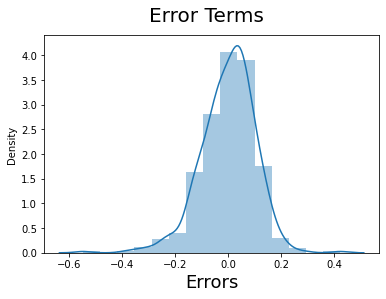

In [78]:
res=y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# Step 9: Making Predictions Using the Final Model

In [79]:
# Selecting the variables which are part of final model.
col=X_train.columns

X_test=X_test[col]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   windspeed   219 non-null    float64
 4   spring      219 non-null    uint8  
 5   summer      219 non-null    uint8  
 6   light Rain  219 non-null    uint8  
 7   mist        219 non-null    uint8  
 8   dec         219 non-null    uint8  
 9   jan         219 non-null    uint8  
 10  nov         219 non-null    uint8  
 11  sep         219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 10.3 KB


In [80]:
# Making predictions using the final model 

y_pred = fit_lr5.predict(X_test_lm5)

## Step 10: Model Evaluation

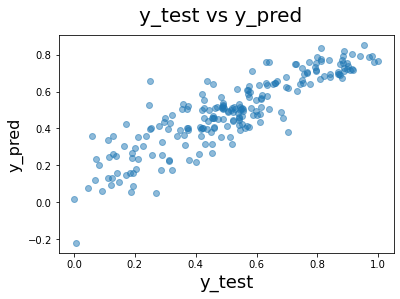

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

We can see that the equation of our best fitted line is:

cnt = 0.584533 + (0.245612 * yr) - (0.085483 * holiday) - (0.191011 * windspeed) - (0.237205 * spring) - (0.039231 * light Rain) - (0.088378 * mist) - (0.116926 * dec) - (0.121489 * jan) - (0.110706 * nov) + (0.060224 * sep) 


## R^2 Value for TEST

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7581903528696503

- We got R_sqaure value for test set is 0.7581 which is near to trained set R_sqaure Value which is 0.792 Hence Model fits great

#### Conclusion : The features which mentioned below are the top 3 features contributing significantly towards explaining the demand of the shared bikes –
- yr
- sep
- rain fall
